<a href="https://colab.research.google.com/github/pachterlab/gget_examples/blob/main/gget_alphafold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [gget alphafold](https://github.com/pachterlab/gget) demonstration
Predict the 3D structure of a protein from its amino acid sequence using a simplified version of [DeepMind](https://www.deepmind.com/)’s [AlphaFold v2.3.0](https://github.com/deepmind/alphafold) originally released and benchmarked for [AlphaFold Colab](https://colab.research.google.com/github/deepmind/alphafold/blob/main/notebooks/AlphaFold.ipynb). To increase speed, set "Runtime" -> "Change runtime type" -> "Hardware accelerator" -> "GPU".  
Also see: [ColabFold](https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb).

Written by Laura Luebbert.
___

### Install and import gget

In [1]:
!pip install -U -q gget
import gget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.9 MB/s eta 0:00:00


In [ ]:
#@title Use Miniconda to install OpenMM

#@markdown To install OpenMM on your local machine, run: `conda install -qy -c conda-forge openmm=7.7.0`. \\
#@markdown (OpenMM version 7.5.1 is also supported by `gget alphafold` and can be installed with: `conda install -qy conda==4.13.0 && conda install -qy -c conda-forge openmm=7.5.1`,
#@markdown however, this is not compatible with Python >=3.10.)

# For pretty plots
%config InlineBackend.figure_format='retina'

# Install Miniconda
import sys
!rm -rf /opt/conda
!wget -q -P /tmp \
  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh \
    && bash /tmp/Miniconda3-latest-Linux-x86_64.sh -b -p /opt/conda \
    && rm /tmp/Miniconda3-latest-Linux-x86_64.sh

# Install openmm v7.7.0
PATH=%env PATH
%env PATH=/opt/conda/bin:{PATH}
!conda install -qy -c conda-forge \
      python=3.10 \
      openmm=7.7.0

# Add to path
sys.path.append('/opt/conda/lib/python3.10/site-packages')

Install third-part dependencies and download AlphaFold model parameters using `gget setup` (this might take a few minutes):

In [3]:
gget.setup("alphafold")

######################################################################## 100.0%


### Predict a protein structure

In [8]:
# Show gget alphafold manual
help(gget.alphafold)

Help on function alphafold in module gget.gget_alphafold:

alphafold(sequence, out='2023_07_14-2318_gget_alphafold_prediction', multimer_for_monomer=False, relax=False, multimer_recycles=3, plot=True, show_sidechains=True, verbose=True)
    Predicts the structure of a protein using a slightly simplified version of AlphaFold v2.3.0 (https://doi.org/10.1038/s41586-021-03819-2)
    published in the AlphaFold Colab notebook (https://colab.research.google.com/github/deepmind/alphafold/blob/main/notebooks/AlphaFold.ipynb).
    
    Args:
      - sequence                Amino acid sequence (str), a list of sequences, or path to a FASTA file.
      - out                     Path to folder to save prediction results in (str).
                                Default: "./[date_time]_gget_alphafold_prediction"
      - multimer_for_monomer    Use multimer model for a monomer (default: False).
      - multimer_recycles       The multimer model will continue recycling until the predictions stop chang

Predict the 3D structure of CASP14 target [T1024](https://predictioncenter.org/casp14/target.cgi?id=8&view=all):

Jackhmmer search: 100%|██████████| 199/199 [elapsed: 47:12 remaining: 00:00]



230 unique sequences found in total for sequence 1



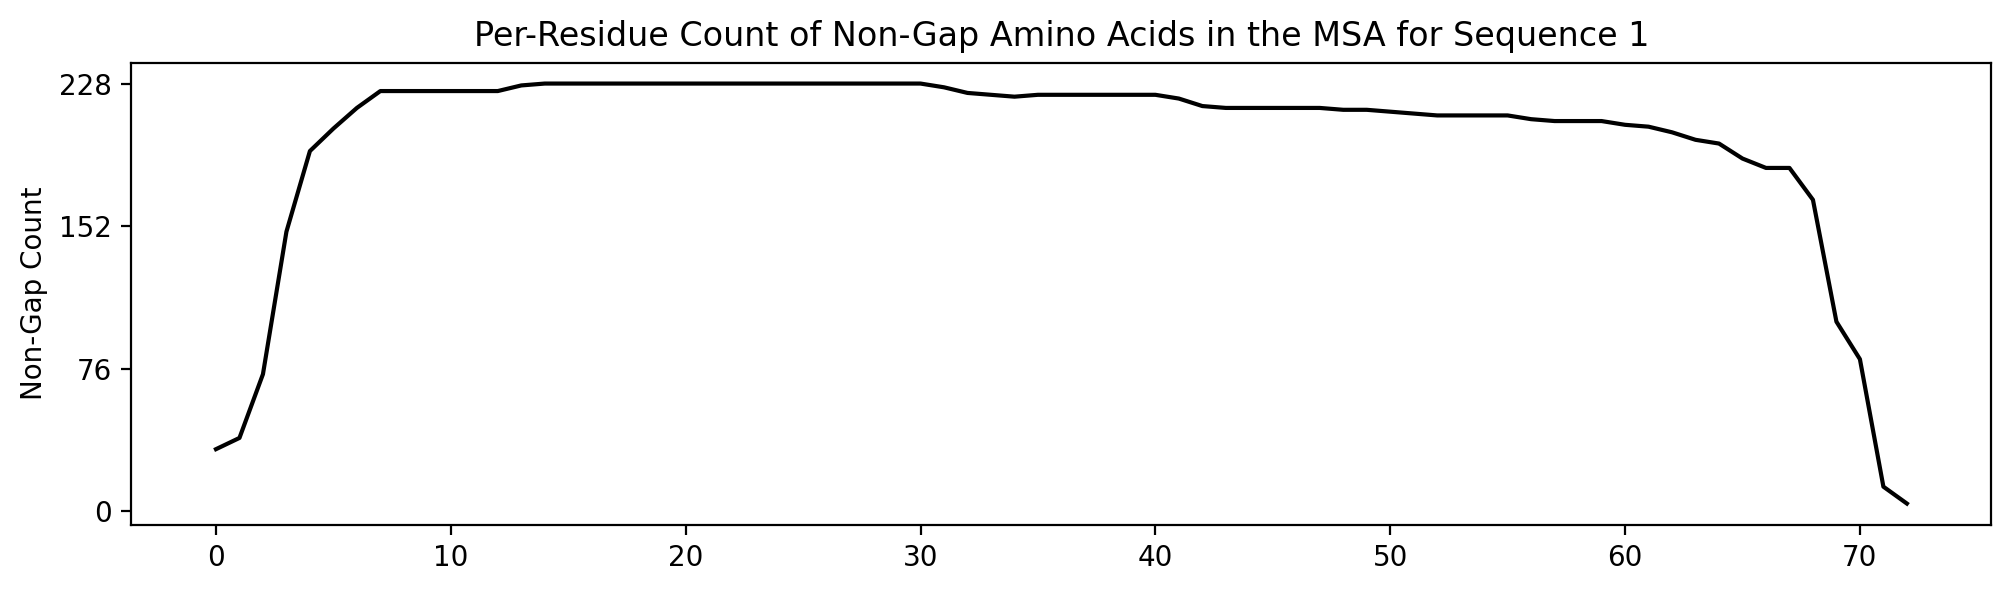

AMBER relaxation: 100%|██████████| 7/7 [elapsed: 20:47 remaining: 00:00]


GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

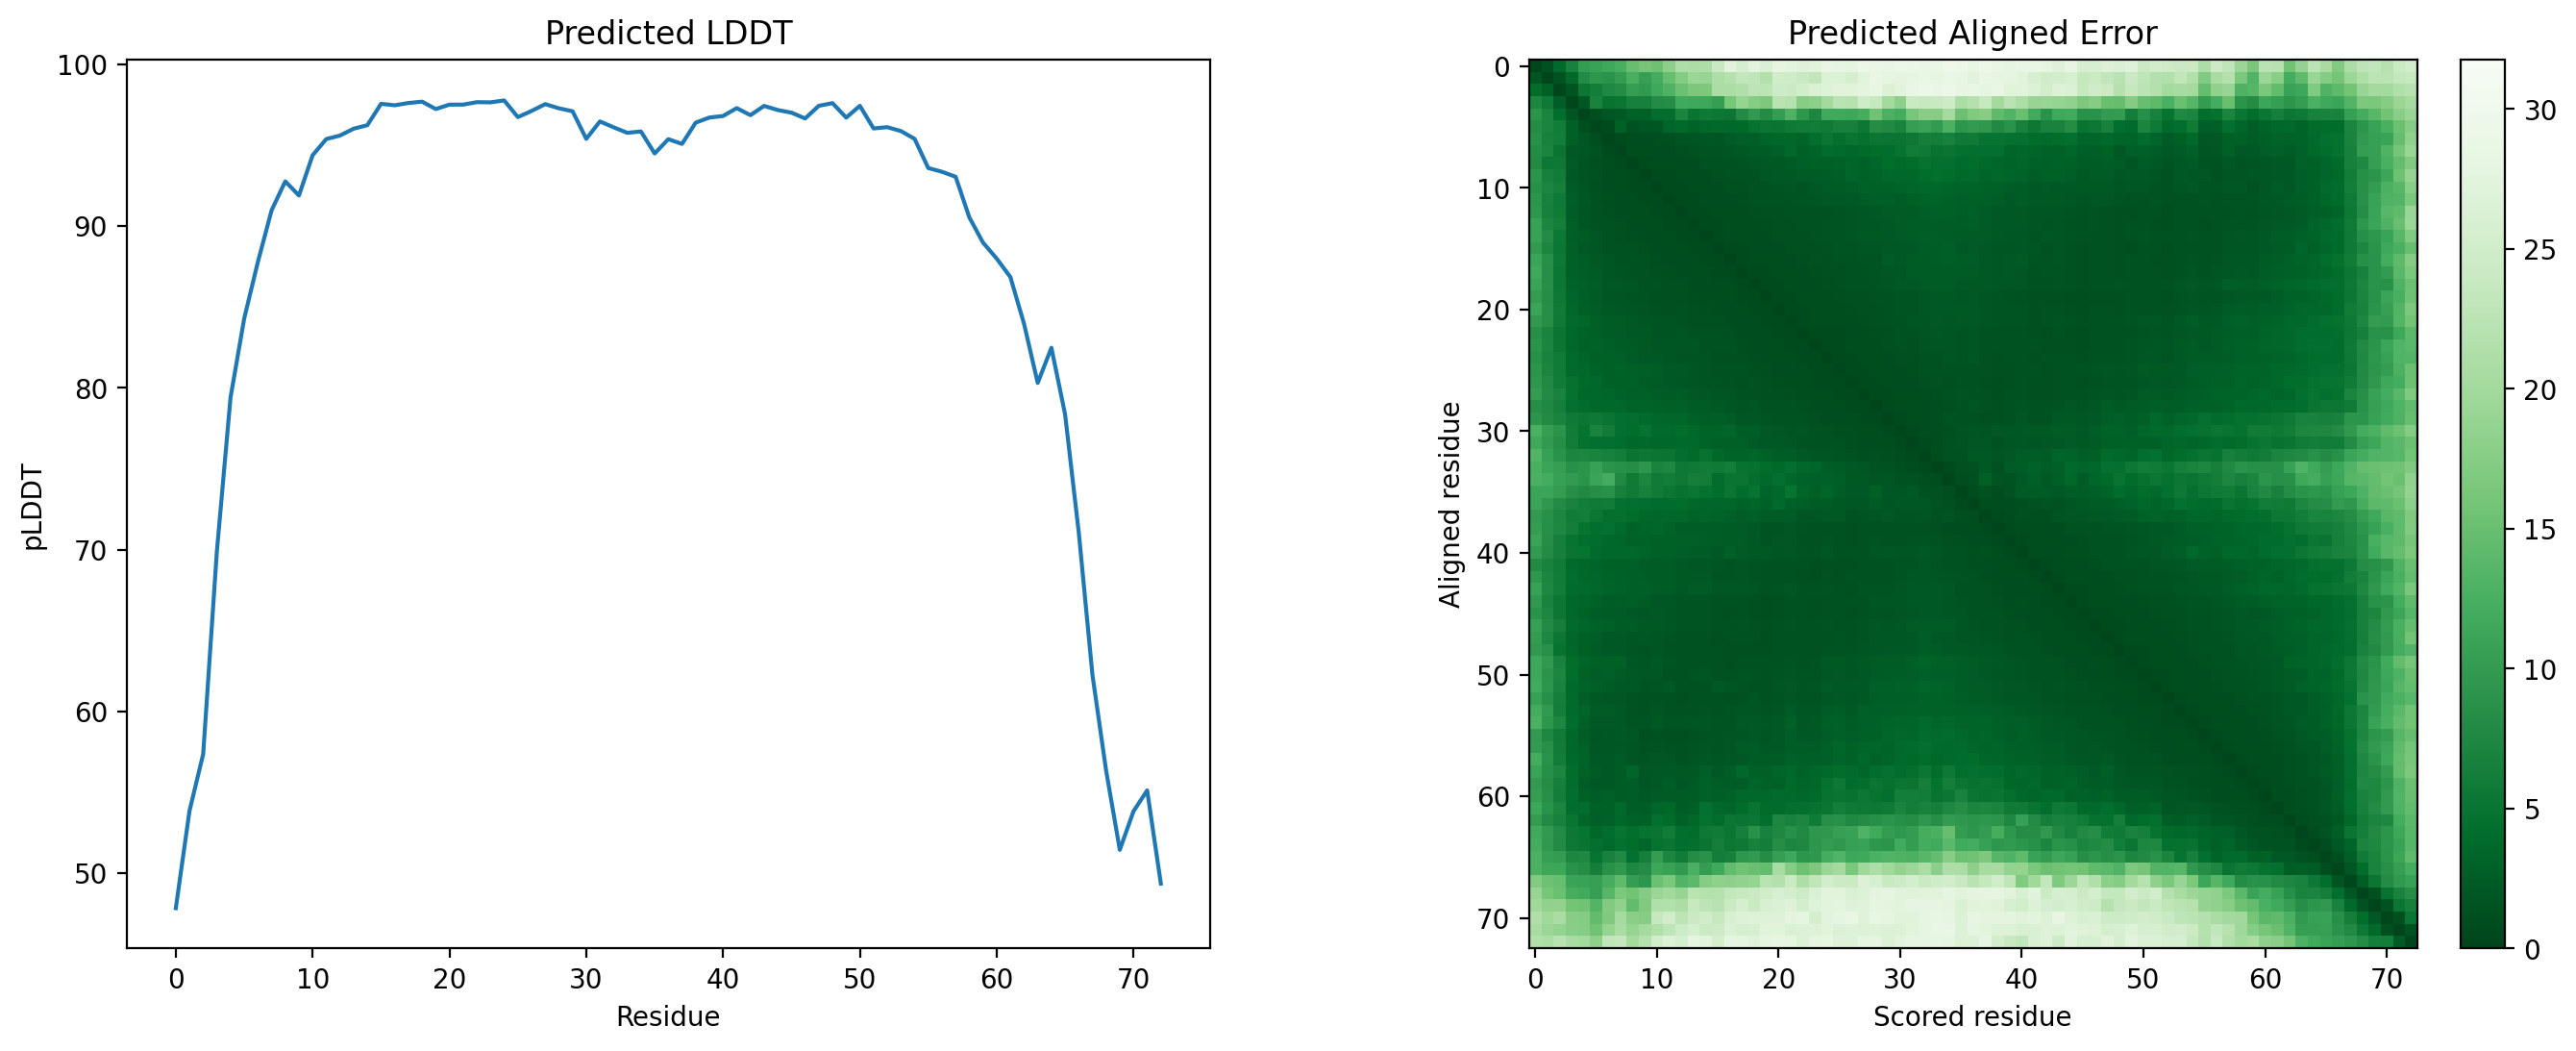

In [5]:
gget.alphafold("MAAHKGAEHHHKAAEHHEQAAKHHHAAAEHHEKGEHEQAAHHADTAYAHHKHAEEHAAQAAKHDAEHHAPKPH", relax=True)

Predict the 3D structure of an engineered fluorescent nicotine sensor ([PDB 7S7U](https://www.rcsb.org/structure/7S7U)):

Jackhmmer search: 100%|██████████| 199/199 [elapsed: 1:37:59 remaining: 00:00]



12043 unique sequences found in total for sequence 1



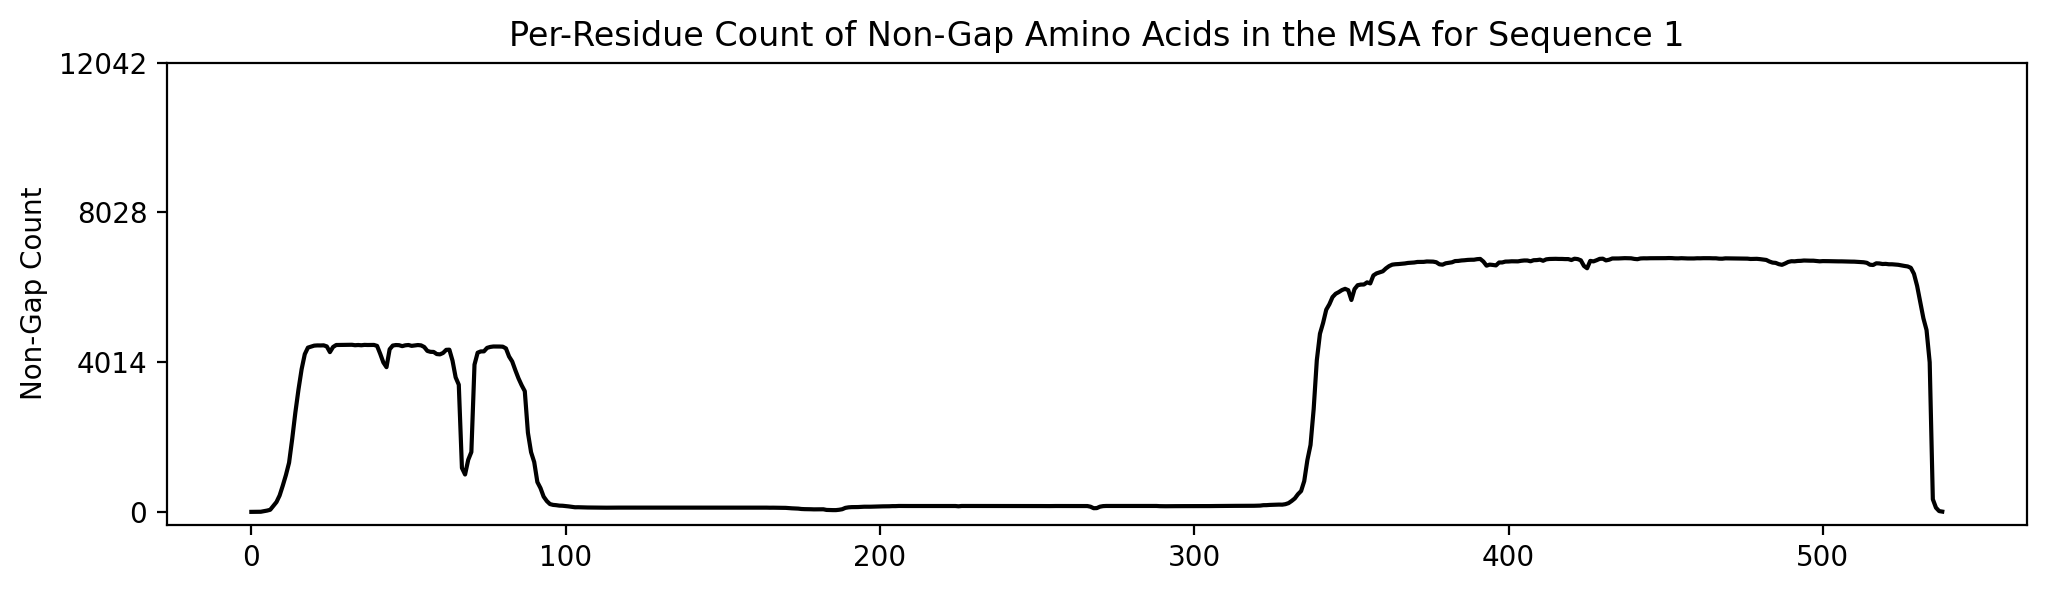

Running model_2_ptm:  86%|████████▌ | 6/7 [elapsed: 51:03 remaining: 08:18]WARNING:root:
Running model without relaxation stage. Use flag [--relax] ('relax=True') to include AMBER relaxation.
Running model_2_ptm: 100%|██████████| 7/7 [elapsed: 51:34 remaining: 00:00]


GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

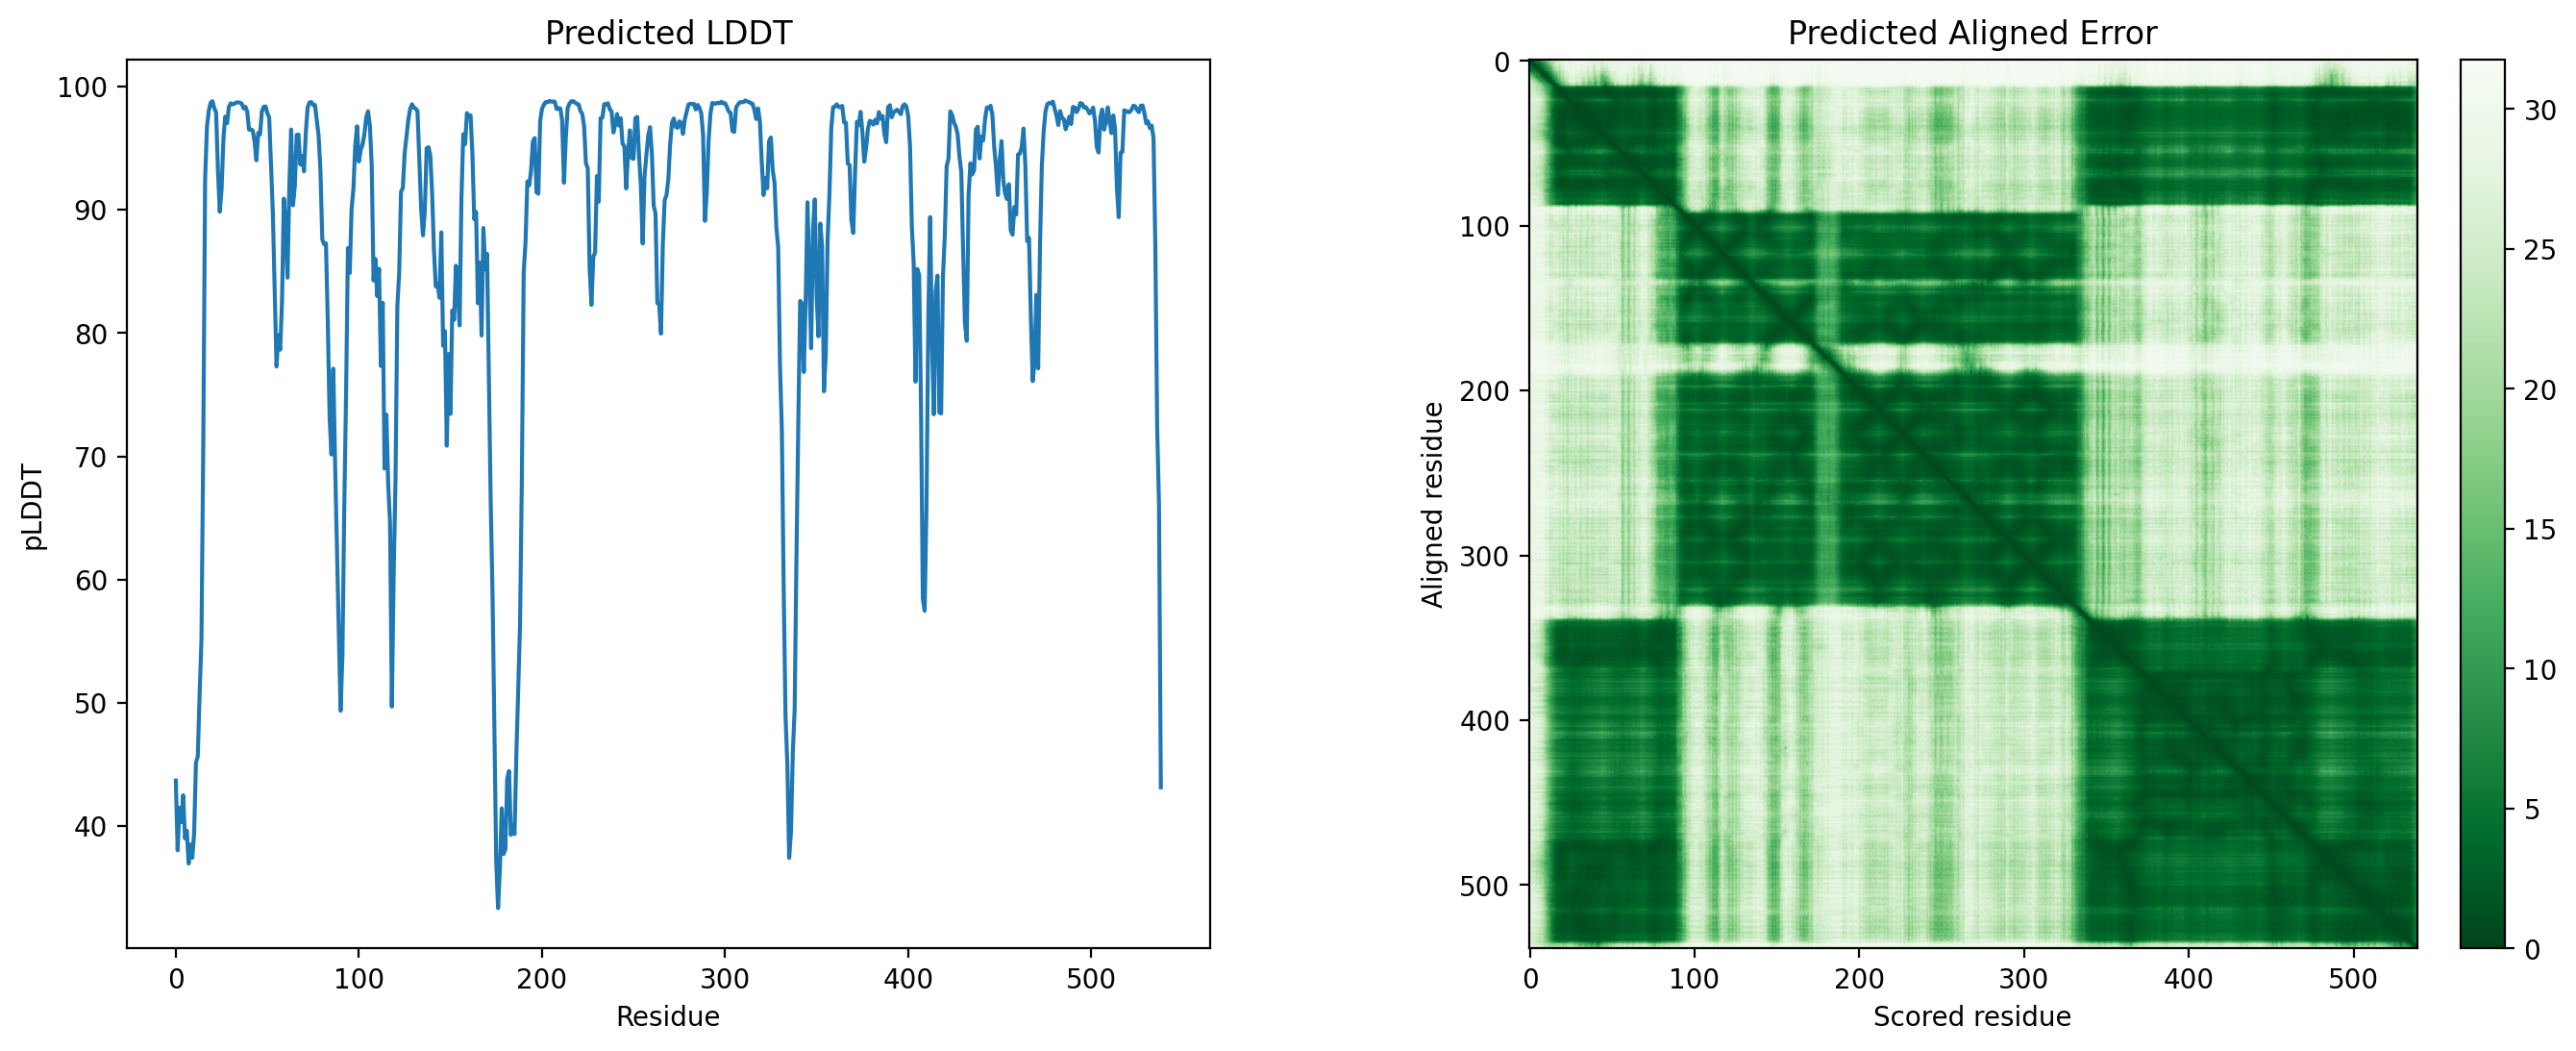

In [9]:
gget.alphafold(
    "MHHHHHHGAQPARSANDTVVVGSINFTEGIIVANMVAEMIEAHTDLKVVRKLNLGGENVNFEAIKRGGANNGIDIYVEYTGHGLVDILGFPEPNVYITADKQKNGIKANFKIRHNMEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSVLSKDPNEKRDHMVLLEFVTAAGITLGMDELYKGGTGGSMSKGEELFTGVVPILVELDGGVNGHKFSVRGEGEGDATNGKLTLKFICTTGKLPVPWPTLVTTLTYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTISFKDDGTYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNFPPPSSTDPEGAYETVKKEYKRKWNIVWLKPLGFNNTYTLTVKDELAKQYNLKTFSDLAKISDKLILGATMFFLEGPDGYPGLQKLYNFKFKHTKSMDMGIRYTAIDNNEVQVIDAWATDGLLVSHKLKILEDDKAFFPPYYAAPIIRQDVLDKHPELKDVLNKLANQISLEEMQKLNYKVDGEGQDPAKVAKEFLKEKGLILQVD",
    show_sidechains=False
    )

Predict the structure of the nicotine sensor 7S7U as a multimer by passing each element separately in a list of sequences (this takes more time since the MSA needs to be built for each sequence separately):

In [ ]:
gget.alphafold(
    [
        "MHHHHHHGAQPARSANDTVVVGSINFTEGIIVANMVAEMIEAHTDLKVVRKLNLGGENVNFEAIKRGGANNGIDIYVEYTGHGLVDILGFPEP",
        "NVYITADKQKNGIKANFKIRHNMEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSVLSKDPNEKRDHMVLLEFVTAAGITLGMDELYKGGTGGSMSKGEELFTGVVPILVELDGGVNGHKFSVRGEGEGDATNGKLTLKFICTTGKLPVPWPTLVTTLTYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTISFKDDGTYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNFPP",
        "PSSTDPEGAYETVKKEYKRKWNIVWLKPLGFNNTYTLTVKDELAKQYNLKTFSDLAKISDKLILGATMFFLEGPDGYPGLQKLYNFKFKHTKSMDMGIRYTAIDNNEVQVIDAWATDGLLVSHKLKILEDDKAFFPPYYAAPIIRQDVLDKHPELKDVLNKLANQISLEEMQKLNYKVDGEGQDPAKVAKEFLKEKGLILQVD"
     ],
    show_sidechains=False
)

In [ ]:
#@title Download the folders created by `gget alphafold`

#@markdown Tip: Especially if you do not have Google Colab Pro, copy-paste this code cell after every prediction to make sure the results are downloaded before they are deleted by Colab.

import shutil
import glob
from google.colab import files

for folder in glob.glob("*_gget_alphafold_prediction"):
  # Zip folder
  shutil.make_archive(folder, "zip", folder)

  # Download zipped file
  files.download(f"{folder}.zip")